In [2]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [3]:
import numpy as np
# np.save('/gdrive/My Drive/global_images_1024.npy', Global_images_array)
# np.save('/gdrive/My Drive/local_images_512.npy', Local_images_array)

Local_images_array = np.load('/gdrive/My Drive/local_images_512.npy')
# Global_images_array = np.load('/gdrive/My Drive/global_images_1024.npy')

# print(Local_images_array.shape)
# print(Global_images_array.shape)

#Resize Global

In [ ]:
import cv2

Global_images_array1 = []

for i in range(len(Global_images_array)):
    # Load the image
    img = Global_images_array[i]
    
    # Resize the image to 512x512 using OpenCV
    resized_img = cv2.resize(img, (512, 512))
    
    # Replace the original image in the array with the resized image
    Global_images_array1.append(resized_img)

In [ ]:
Global_images_array = np.array(Global_images_array1)

In [ ]:
np.shape(Global_images_array)

(3200, 512, 512, 3)

#Creating sample test set

In [ ]:
image1 = Local_images_array[:160]
image2 = Local_images_array[800:960]
image3 = Local_images_array[1600:1760]
image4 = Local_images_array[2400:2560]


image11 = Local_images_array[160:800]
image22 = Local_images_array[960:1600]
image33 = Local_images_array[1760:2400]
image44 = Local_images_array[2560:]

In [ ]:
# concatenate the first four
images_test = np.concatenate([image1, image2, image3, image4], axis=0)

# concatenate the second four
images_train = np.concatenate([image11, image22, image33, image44], axis=0)

In [ ]:
images_test.shape

(640, 512, 512, 3)

In [ ]:
images_train.shape

(2560, 512, 512, 3)

In [ ]:
import numpy as np

# Save first four images
np.save('/gdrive/My Drive/train_local.npy', images_train)

# Save second four images
np.save('/gdrive/My Drive/test_local.npy', images_test)

#Previous experiments

In [6]:
import numpy as np

b_label = [0] * 800
n_label = [1] * 800
inv_label = [2] * 800
ins_label = [3] * 800
y = b_label + n_label + inv_label + ins_label

num_classes = 4


In [7]:
from keras.utils import to_categorical
labels = to_categorical(y)

In [ ]:
labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
import numpy as np

# Load pre-trained VGG16 model without top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(512, 512, 3))

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# Create new model with custom top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers in base model for transfer learning
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(Local_images_array, labels, test_size=0.2, random_state=42)

In [ ]:
model.fit(train_data, train_labels, epochs=10, batch_size=4)

Epoch 1/10
640/640 [==============================] - 78s 103ms/step - loss: 1.1181 - accuracy: 0.6223
Epoch 2/10
640/640 [==============================] - 70s 109ms/step - loss: 0.5495 - accuracy: 0.8008
Epoch 3/10
640/640 [==============================] - 73s 114ms/step - loss: 0.4001 - accuracy: 0.8492
Epoch 4/10
640/640 [==============================] - 75s 117ms/step - loss: 0.2619 - accuracy: 0.9004
Epoch 5/10
640/640 [==============================] - 75s 118ms/step - loss: 0.2556 - accuracy: 0.9023
Epoch 6/10
640/640 [==============================] - 75s 118ms/step - loss: 0.1849 - accuracy: 0.9387
Epoch 7/10
640/640 [==============================] - 76s 118ms/step - loss: 0.1524 - accuracy: 0.9441
Epoch 8/10
640/640 [==============================] - 75s 118ms/step - loss: 0.1622 - accuracy: 0.9473
Epoch 9/10
640/640 [==============================] - 76s 118ms/step - loss: 0.0947 - accuracy: 0.9703
Epoch 10/10
640/640 [==============================] - 76s 119ms/step - l

In [ ]:
loss, accuracy = model.evaluate(test_data, test_labels)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

20/20 [==============================] - 32s 728ms/step - loss: 0.1954 - accuracy: 0.9281
Test loss: 0.1953846514225006
Test accuracy: 0.9281250238418579


In [ ]:
y_prob = model.predict(test_data)

# Convert class probabilities to class labels
y_pred = np.argmax(y_prob, axis=1)

20/20 [==============================] - 13s 679ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(test_labels, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       188
           1       0.87      0.99      0.93       155
           2       0.94      0.95      0.94       164
           3       0.98      0.90      0.94       133

    accuracy                           0.93       640
   macro avg       0.93      0.93      0.93       640
weighted avg       0.93      0.93      0.93       640



In [ ]:
from keras.models import Model

feature_model = Model(inputs=model.input, outputs=model.layers[-2].output)
features = feature_model.predict(train_data)

80/80 [==============================] - 56s 703ms/step


In [ ]:
features_test = feature_model.predict(test_data)

20/20 [==============================] - 13s 694ms/step


In [ ]:
model.save("/gdrive/My Drive/Colab Notebooks/VGG_Model_Local.h5")

In [ ]:
#saving test features
np.save('/gdrive/My Drive/Colab Notebooks/VGG_Model_LocalPatchSupervised_Feats.npy', features_test)

In [ ]:
percent_zero = np.count_nonzero(features) / features.size * 100

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
# fit model no training data
Xgb_clf = XGBClassifier()
Xgb_clf.fit(features, train_labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
XGB_y_preds = Xgb_clf.predict(features_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, XGB_y_preds))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       188
           1       0.95      0.95      0.95       155
           2       0.97      0.90      0.93       164
           3       0.98      0.87      0.92       133

   micro avg       0.96      0.90      0.93       640
   macro avg       0.96      0.90      0.93       640
weighted avg       0.96      0.90      0.93       640
 samples avg       0.89      0.90      0.89       640



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np

def split_data(X, y, test_size=0.2, random_state=5432):
    # Reshape X and y so that every 8 samples are treated as one datum
    n_datapoints = X.shape[0] // 8
    print(n_datapoints)
    X = X[:n_datapoints*8].reshape(n_datapoints, 8, X.shape[1], X.shape[2], X.shape[3])
    # X = X[:n_datapoints*8].reshape(n_datapoints, 8, X.shape[1])
    y = y[:n_datapoints*8].reshape(n_datapoints, 8, y.shape[1])
    
    # Split the data into training and testing sets
    n_test = int(n_datapoints * test_size)
    np.random.seed(random_state)
    indices = np.random.permutation(n_datapoints)
    X_train = X[indices[n_test:], :]
    y_train = y[indices[n_test:], :, :]
    X_test = X[indices[:n_test], :]
    y_test = y[indices[:n_test], :, :]
    
    return X_train, y_train, X_test, y_test

In [ ]:
X_train, y_train, X_test, y_test = split_data(features, train_labels)

320


In [ ]:
features.shape

(2560, 512)

In [ ]:
y_train.shape

(256, 8, 4)

# Train using new train test split

(3200, 4)

In [ ]:
X_train, y_train, X_test, y_test = split_data(Local_images_array, labels)

400


In [ ]:
y_train.shape

(320, 8, 4)

In [ ]:
X_train = X_train.reshape((320*8,512, 512, 3))
y_train = y_train.reshape((320*8,4))

In [ ]:
X_train.shape

(2560, 512, 512, 3)

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
160/160 [==============================] - 68s 317ms/step - loss: 1.0705 - accuracy: 0.6363
Epoch 2/10
160/160 [==============================] - 57s 354ms/step - loss: 0.4595 - accuracy: 0.8188
Epoch 3/10
160/160 [==============================] - 56s 347ms/step - loss: 0.2478 - accuracy: 0.9098
Epoch 4/10
160/160 [==============================] - 56s 351ms/step - loss: 0.1905 - accuracy: 0.9316
Epoch 5/10
160/160 [==============================] - 56s 350ms/step - loss: 0.1145 - accuracy: 0.9637
Epoch 6/10
160/160 [==============================] - 56s 352ms/step - loss: 0.0842 - accuracy: 0.9793
Epoch 7/10
160/160 [==============================] - 56s 350ms/step - loss: 0.0646 - accuracy: 0.9832
Epoch 8/10
160/160 [==============================] - 56s 350ms/step - loss: 0.0401 - accuracy: 0.9902
Epoch 9/10
160/160 [==============================] - 56s 350ms/step - loss: 0.0230 - accuracy: 0.9977
Epoch 10/10
160/160 [==============================] - 56s 349ms/step - l

In [ ]:
X_test = X_test.reshape((80*8,512, 512, 3))
y_test = y_test.reshape((80*8,4))

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

20/20 [==============================] - 29s 618ms/step - loss: 0.0503 - accuracy: 0.9859
Test loss: 0.050257839262485504
Test accuracy: 0.9859374761581421


In [ ]:
from keras.models import Model

feature_model = Model(inputs=model.input, outputs=model.layers[-2].output)
features_train = feature_model.predict(X_train)

80/80 [==============================] - 76s 726ms/step


In [ ]:
features_test = feature_model.predict(X_test)

20/20 [==============================] - 13s 703ms/step


In [ ]:
model.save("/gdrive/My Drive/Colab Notebooks/VGG_Model_Local_1.h5")

In [ ]:
np.save('/gdrive/My Drive/Colab Notebooks/VGG_Model_Local_1_LocalPatchSupervised_FeatsTrain.npy', features_train)
np.save('/gdrive/My Drive/Colab Notebooks/VGG_Model_Local_1_LocalPatchSupervised_FeatsTest.npy', features_test)

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
# fit model no training data
Xgb_clf = XGBClassifier()
Xgb_clf.fit(features_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
XGB_y_preds = Xgb_clf.predict(features_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, XGB_y_preds))

              precision    recall  f1-score   support

           0       0.75      0.63      0.68       208
           1       0.69      0.56      0.62       144
           2       0.72      0.42      0.53       144
           3       0.70      0.71      0.71       144

   micro avg       0.72      0.59      0.65       640
   macro avg       0.72      0.58      0.64       640
weighted avg       0.72      0.59      0.64       640
 samples avg       0.57      0.59      0.57       640



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Load Model for Feature Extraction

In [ ]:
from keras.models import load_model

# Load saved model
model = load_model('/gdrive/My Drive/Colab Notebooks/VGG_Model_Local.h5')

In [ ]:
X_train, y_train, X_test, y_test = split_data(Local_images_array, labels)
X_train = X_train.reshape((320*8,512, 512, 3))
y_train = y_train.reshape((320*8,4))
X_test = X_test.reshape((80*8,512, 512, 3))
y_test = y_test.reshape((80*8,4))

400


In [ ]:
from keras.models import Model

feature_model = Model(inputs=model.input, outputs=model.layers[-2].output)
features = feature_model.predict(X_train)

80/80 [==============================] - 51s 645ms/step


In [ ]:
features_test = feature_model.predict(X_test)

20/20 [==============================] - 12s 632ms/step


In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
# fit model no training data
Xgb_clf = XGBClassifier()
Xgb_clf.fit(features, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
XGB_y_preds = Xgb_clf.predict(features_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, XGB_y_preds))

              precision    recall  f1-score   support

           0       0.97      0.86      0.92       200
           1       0.96      0.81      0.87       160
           2       0.95      0.92      0.94       160
           3       0.97      0.88      0.93       120

   micro avg       0.96      0.87      0.91       640
   macro avg       0.96      0.87      0.91       640
weighted avg       0.96      0.87      0.91       640
 samples avg       0.86      0.87      0.86       640



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Checking Global

In [9]:
import numpy as np

def split_data(X, y, test_size=0.2, random_state=5432):
    # Reshape X and y so that every 8 samples are treated as one datum
    n_datapoints = X.shape[0] // 8
    print(n_datapoints)
    X = X[:n_datapoints*8].reshape(n_datapoints, 8, X.shape[1], X.shape[2], X.shape[3])
    # X = X[:n_datapoints*8].reshape(n_datapoints, 8, X.shape[1])
    y = y[:n_datapoints*8].reshape(n_datapoints, 8, y.shape[1])
    
    # Split the data into training and testing sets
    n_test = int(n_datapoints * test_size)
    np.random.seed(random_state)
    indices = np.random.permutation(n_datapoints)
    X_train = X[indices[n_test:], :]
    y_train = y[indices[n_test:], :, :]
    X_test = X[indices[:n_test], :]
    y_test = y[indices[:n_test], :, :]
    
    return X_train, y_train, X_test, y_test

In [ ]:
import numpy as np

def split_data_local_global(X,X1, y, test_size=0.2, random_state=5432):
    # Reshape X and y so that every 8 samples are treated as one datum
    n_datapoints = X.shape[0] // 8
    print(n_datapoints)
    X = X[:n_datapoints*8].reshape(n_datapoints, 8, X.shape[1], X.shape[2], X.shape[3])
    X1 = X1[:n_datapoints*8].reshape(n_datapoints, 8, X1.shape[1], X1.shape[2], X1.shape[3])
    # X = X[:n_datapoints*8].reshape(n_datapoints, 8, X.shape[1])
    y = y[:n_datapoints*8].reshape(n_datapoints, 8, y.shape[1])
    
    # Split the data into training and testing sets
    n_test = int(n_datapoints * test_size)
    np.random.seed(random_state)
    indices = np.random.permutation(n_datapoints)
    X_train = X[indices[n_test:], :]
    X_train_global = X1[indices[n_test:], :]
    y_train = y[indices[n_test:], :, :]
    X_test = X[indices[:n_test], :]
    X_test_global = X1[indices[:n_test], :]
    y_test = y[indices[:n_test], :, :]
    
    return X_train, X_train_global, y_train, X_test, X_test_global, y_test

In [ ]:
X_train, X_train_global, y_train, X_test, X_test_global, y_test = split_data_local_global(Local_images_array,Global_images_array, labels)
X_train_global = X_train_global.reshape((320*8,512, 512, 3))
X_train = X_train.reshape((320*8,512, 512, 3))
y_train = y_train.reshape((320*8,4))
X_test = X_test.reshape((80*8,512, 512, 3))
X_test_global = X_test_global.reshape((80*8,512, 512, 3))
y_test = y_test.reshape((80*8,4))

# First Save Features

In [10]:
X_train, y_train, X_test, y_test = split_data(Local_images_array, labels)
X_train = X_train.reshape((320*8,512, 512, 3))
y_train = y_train.reshape((320*8,4))
X_test = X_test.reshape((80*8,512, 512, 3))
y_test = y_test.reshape((80*8,4))

400


In [ ]:
from keras.models import load_model

# Load saved model
model = load_model('/gdrive/My Drive/Colab Notebooks/VGG_Model_Local_1.h5')

In [ ]:
from keras.models import Model

feature_model = Model(inputs=model.input, outputs=model.layers[-2].output)
features = feature_model.predict(X_train)

In [ ]:
features_test = feature_model.predict(X_test)

20/20 [==============================] - 12s 629ms/step


In [ ]:
np.save('/gdrive/My Drive/Colab Notebooks/supervised_train_local_feature_vgg16.npy', features)

In [ ]:
np.save('/gdrive/My Drive/Colab Notebooks/supervised_test_local_feature_vgg16.npy', features_test)

# Use Saved Features for Local Global Prediction

In [12]:
import numpy as np
features_global = np.load('/gdrive/My Drive/Colab Notebooks/supervised_train_global_feature_vgg16.npy')
features_local = np.load('/gdrive/My Drive/Colab Notebooks/supervised_train_local_feature_vgg16.npy')

features_global_test = np.load('/gdrive/My Drive/Colab Notebooks/supervised_test_global_feature_vgg16.npy')

features_local_test = np.load('/gdrive/My Drive/Colab Notebooks/supervised_test_local_feature_vgg16.npy')


In [ ]:
features_local.shape

(640, 512)

In [13]:
X_concatenated_train = np.concatenate((features_local, features_global), axis=1)
X_concatenated_test= np.concatenate((features_local_test, features_global_test), axis=1)

In [14]:
y_train_xgb = np.argmax(y_train, axis=1)
y_test_xgb = np.argmax(y_test, axis=1)

In [16]:
from numpy import loadtxt
from xgboost import XGBClassifier
# fit model no training data
Xgb_clf = XGBClassifier()
Xgb_clf.fit(X_concatenated_train, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [17]:
XGB_y_preds = Xgb_clf.predict(X_concatenated_test)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test_xgb, XGB_y_preds))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       200
           1       0.81      0.74      0.77       160
           2       0.77      0.83      0.80       160
           3       0.58      0.62      0.60       120

    accuracy                           0.75       640
   macro avg       0.74      0.74      0.74       640
weighted avg       0.75      0.75      0.75       640



In [ ]:
y_pred_prob = Xgb_clf.predict_proba(X_concatenated_test)[:, 1]  # predicted probabilities for the positive class
from sklearn.metrics import roc_auc_score
# Calculate AUC
auc = roc_auc_score(y_test_xgb, XGB_y_preds)
print("AUC:", auc)

#Voting 

In [19]:
y_pred = []
for i in range(int(len(y_test_xgb)/8)):
      start = 8*i
      end = 8*i +8
      # get the labels of the current group
      group_pred = XGB_y_preds[start:end]
      # use voting to predict the label of the group
      pred_label = np.argmax(np.bincount(group_pred))
      y_pred.append(pred_label)

In [20]:
y_test_xgb_new = []
for i in range(int(len(y_test_xgb)/8)):
      start = 8*i
      end = 8*i +8
      # get the labels of the current group
      group_pred = y_test_xgb[start:end]
      # use voting to predict the label of the group
      pred_label = np.argmax(np.bincount(group_pred))
      y_test_xgb_new.append(pred_label)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test_xgb_new, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        25
           1       0.94      0.75      0.83        20
           2       0.79      0.95      0.86        20
           3       0.69      0.60      0.64        15

    accuracy                           0.81        80
   macro avg       0.81      0.80      0.80        80
weighted avg       0.82      0.81      0.81        80



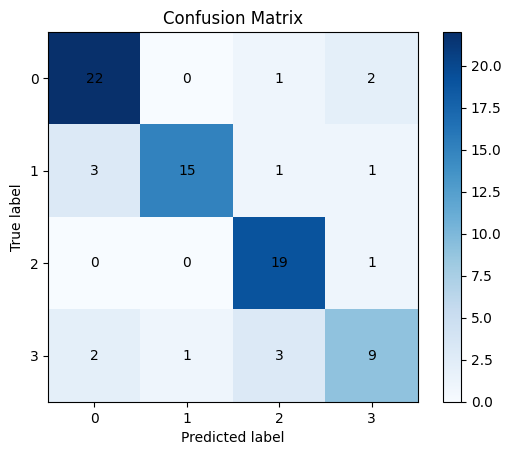

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_xgb_new, y_pred)


# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# add numbers to the plot
for i in range(len(cm)):
    for j in range(len(cm)):
        ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

# add labels, title, and colorbar
ax.set_xticks(np.arange(len(cm)))
ax.set_yticks(np.arange(len(cm)))
ax.set_xticklabels(np.arange(len(cm)))
ax.set_yticklabels(np.arange(len(cm)))
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
fig.colorbar(im)
plt.show()

# KNN

In [22]:
from numpy import loadtxt
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
KNN_model = KNeighborsClassifier(n_neighbors=11)
KNN_model.fit(X_concatenated_train, y_train_xgb)

KNeighborsClassifier(n_neighbors=11)

In [23]:
KNN_y_preds = KNN_model.predict(X_concatenated_test)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test_xgb, KNN_y_preds))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69       200
           1       0.79      0.64      0.71       160
           2       0.67      0.72      0.70       160
           3       0.57      0.57      0.57       120

    accuracy                           0.68       640
   macro avg       0.67      0.67      0.67       640
weighted avg       0.68      0.68      0.68       640



In [28]:
y_pred = []
for i in range(int(len(y_test_xgb)/8)):
      start = 8*i
      end = 8*i +8
      # get the labels of the current group
      group_pred = KNN_y_preds[start:end]
      # use voting to predict the label of the group
      pred_label = np.argmax(np.bincount(group_pred))
      y_pred.append(pred_label)

In [29]:
y_test_xgb_new = []
for i in range(int(len(y_test_xgb)/8)):
      start = 8*i
      end = 8*i +8
      # get the labels of the current group
      group_pred = y_test_xgb[start:end]
      # use voting to predict the label of the group
      pred_label = np.argmax(np.bincount(group_pred))
      y_test_xgb_new.append(pred_label)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test_xgb_new, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.80      0.71        25
           1       0.76      0.65      0.70        20
           2       0.75      0.75      0.75        20
           3       0.67      0.53      0.59        15

    accuracy                           0.70        80
   macro avg       0.71      0.68      0.69        80
weighted avg       0.71      0.70      0.70        80



# 2 Class classification on XGB

In [ ]:
y_test_xgb_new, y_pred

# Convert to two-class classification
y_pred_new = np.where(np.isin(y_pred, [0, 1]), 0, 1)
y_test_new = np.where(np.isin(y_test_xgb_new, [0, 1]), 0, 1)

print(classification_report(y_test_new, y_pred_new))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        45
           1       0.86      0.91      0.89        35

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.90      0.90      0.90        80



In [31]:
# KNN 2 class

y_pred_new = np.where(np.isin(y_pred, [0, 1]), 0, 1)
y_test_new = np.where(np.isin(y_test_xgb_new, [0, 1]), 0, 1)

print(classification_report(y_test_new, y_pred_new))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        45
           1       0.84      0.77      0.81        35

    accuracy                           0.84        80
   macro avg       0.84      0.83      0.83        80
weighted avg       0.84      0.84      0.84        80



# SVM

In [34]:
from numpy import loadtxt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from xgboost import XGBClassifier
SVM_model = svm.SVC()
SVM_model.fit(X_concatenated_train, y_train_xgb)

SVC()

In [35]:
SVM_y_preds = SVM_model.predict(X_concatenated_test)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test_xgb, SVM_y_preds))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       200
           1       0.87      0.74      0.80       160
           2       0.78      0.82      0.80       160
           3       0.72      0.66      0.69       120

    accuracy                           0.78       640
   macro avg       0.78      0.77      0.77       640
weighted avg       0.78      0.78      0.78       640



In [37]:
y_pred = []
for i in range(int(len(y_test_xgb)/8)):
      start = 8*i
      end = 8*i +8
      # get the labels of the current group
      group_pred = SVM_y_preds[start:end]
      # use voting to predict the label of the group
      pred_label = np.argmax(np.bincount(group_pred))
      y_pred.append(pred_label)

In [38]:
y_test_xgb_new = []
for i in range(int(len(y_test_xgb)/8)):
      start = 8*i
      end = 8*i +8
      # get the labels of the current group
      group_pred = y_test_xgb[start:end]
      # use voting to predict the label of the group
      pred_label = np.argmax(np.bincount(group_pred))
      y_test_xgb_new.append(pred_label)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test_xgb_new, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        25
           1       0.94      0.75      0.83        20
           2       0.77      0.85      0.81        20
           3       0.75      0.60      0.67        15

    accuracy                           0.80        80
   macro avg       0.81      0.78      0.79        80
weighted avg       0.81      0.80      0.80        80



In [40]:
# SVM 2 class

y_pred_new = np.where(np.isin(y_pred, [0, 1]), 0, 1)
y_test_new = np.where(np.isin(y_test_xgb_new, [0, 1]), 0, 1)

print(classification_report(y_test_new, y_pred_new))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        45
           1       0.88      0.86      0.87        35

    accuracy                           0.89        80
   macro avg       0.89      0.88      0.89        80
weighted avg       0.89      0.89      0.89        80



#Just local

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
# fit model no training data
Xgb_clf = XGBClassifier()
Xgb_clf.fit(features_local, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
XGB_y_preds = Xgb_clf.predict(features_local_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_xgb, XGB_y_preds))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       200
           1       0.75      0.71      0.73       160
           2       0.71      0.81      0.76       160
           3       0.52      0.57      0.55       120

    accuracy                           0.70       640
   macro avg       0.69      0.69      0.69       640
weighted avg       0.70      0.70      0.70       640



# New experiment 

In [ ]:
# Load first four images
images_train = np.load('/gdrive/My Drive/train_local.npy')

# Load second four images
images_test = np.load('/gdrive/My Drive/train_local.npy')

In [ ]:
import numpy as np

b_label = [0] * 640
n_label = [1] * 640
inv_label = [2] * 640
ins_label = [3] * 640
y_train = b_label + n_label + inv_label + ins_label

b_label = [0] * 160
n_label = [1] * 160
inv_label = [2] * 160
ins_label = [3] * 160
y_test = b_label + n_label + inv_label + ins_label

num_classes = 4


In [ ]:
from keras.utils import to_categorical
labels_traing = to_categorical(y_train)
labels_test = to_categorical(y_test)

In [ ]:
model.fit(images_train, labels_traing, epochs=10, batch_size=8)

Epoch 1/10
320/320 [==============================] - 78s 198ms/step - loss: 1.0882 - accuracy: 0.6430
Epoch 2/10
320/320 [==============================] - 67s 210ms/step - loss: 0.4442 - accuracy: 0.8246
Epoch 3/10
320/320 [==============================] - 67s 211ms/step - loss: 0.2688 - accuracy: 0.9039
Epoch 4/10
320/320 [==============================] - 68s 211ms/step - loss: 0.1790 - accuracy: 0.9367
Epoch 5/10
320/320 [==============================] - 67s 210ms/step - loss: 0.1520 - accuracy: 0.9426
Epoch 6/10
320/320 [==============================] - 68s 211ms/step - loss: 0.1477 - accuracy: 0.9480
Epoch 7/10
320/320 [==============================] - 67s 210ms/step - loss: 0.0776 - accuracy: 0.9750
Epoch 8/10
320/320 [==============================] - 68s 211ms/step - loss: 0.0460 - accuracy: 0.9879
Epoch 9/10
320/320 [==============================] - 67s 210ms/step - loss: 0.0595 - accuracy: 0.9816
Epoch 10/10
320/320 [==============================] - 67s 210ms/step - l

In [ ]:
loss, accuracy = model.evaluate(images_test, labels_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

20/20 [==============================] - 30s 660ms/step - loss: 2.7323 - accuracy: 0.5359
Test loss: 2.732264995574951
Test accuracy: 0.535937488079071


In [ ]:
from keras.models import Model

feature_model = Model(inputs=model.input, outputs=model.layers[-2].output)
features = feature_model.predict(images_train)

80/80 [==============================] - 52s 656ms/step


In [ ]:
features_test = feature_model.predict(images_test)

20/20 [==============================] - 12s 635ms/step


In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
# fit model no training data
Xgb_clf = XGBClassifier()
Xgb_clf.fit(features, labels_traing)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
XGB_y_preds = Xgb_clf.predict(features_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, XGB_y_preds))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       160
           1       0.91      0.84      0.87       160
           2       0.91      0.73      0.81       160
           3       0.97      0.94      0.95       160

   micro avg       0.93      0.84      0.88       640
   macro avg       0.93      0.84      0.88       640
weighted avg       0.93      0.84      0.88       640
 samples avg       0.82      0.84      0.83       640



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
